## Importer les librairies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Charger le dataset

In [3]:
data = pd.read_excel("Data_Train.xlsx")
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## Petite Inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

## Corriger quelques incoherences ou erreurs

In [6]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [7]:
stops_mapping = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}

# Remplacement des valeurs
data["Total_Stops"] = data["Total_Stops"].map(stops_mapping)

# Conversion en type numérique (float ou int)
data["Total_Stops"] = pd.to_numeric(data["Total_Stops"], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  float64
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 918.2+ KB


In [9]:
data['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [10]:
data = data.assign(**{
col: pd.to_datetime(data.loc[:, col], dayfirst=True, format="mixed")
for col in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]
})
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops               float64
Additional_Info            object
Price                       int64
dtype: object

In [11]:
import re
def convert_duration_to_minutes(duration_str):
    if pd.isnull(duration_str):
        return None
    hours = re.search(r"(\d+)h", duration_str)
    minutes = re.search(r"(\d+)m", duration_str)

    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    return total_minutes

data["Duration"] = data["Duration"].apply(convert_duration_to_minutes).astype("Int64")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  Int64         
 8   Total_Stops      10682 non-null  float64       
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: Int64(1), datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 928.6+ KB


In [13]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-30 22:20:00,2025-03-22 01:10:00,170,0.0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-30 05:50:00,2025-04-30 13:15:00,445,2.0,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-30 09:25:00,2025-06-10 04:25:00,1140,2.0,No info,13882


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  Int64         
 8   Total_Stops      10682 non-null  float64       
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: Int64(1), datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 928.6+ KB


In [15]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Analyse Descriptive Initiale

### Resume descriptif 

In [16]:
data.describe(include="number")

,Duration,Total_Stops,Price
count,10683.0,10682.000000,10683.000000
mean,643.093232,0.824190,9087.064121
std,507.862001,0.675229,4611.359167
min,5.0,0.000000,1759.000000
25%,170.0,0.000000,5277.000000
50%,520.0,1.000000,8372.000000
75%,930.0,1.000000,12373.000000
max,2860.0,4.000000,79512.000000


In [17]:
data = data.dropna()

### Visualisation

#### Variables : Duration, Price et Total_Stops

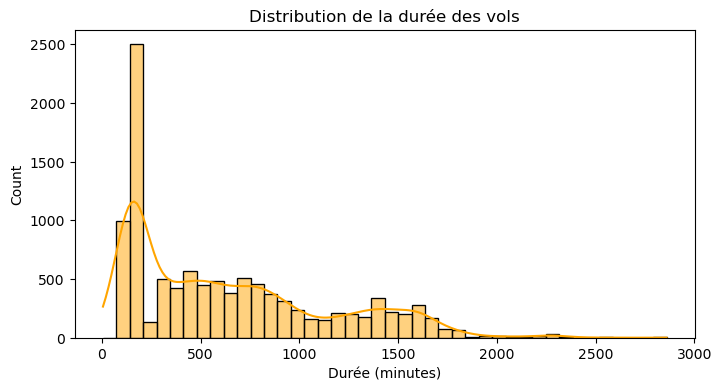

In [18]:
# Histogramme
plt.figure(figsize=(8, 4))
sns.histplot(data["Duration"], kde=True, color="orange")
plt.title("Distribution de la durée des vols")
plt.xlabel("Durée (minutes)")
plt.show()

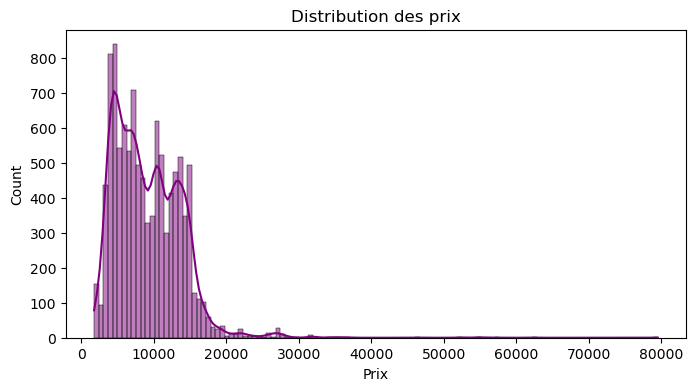

In [19]:
# Histogramme
plt.figure(figsize=(8, 4))
sns.histplot(data["Price"], kde=True, color="purple")
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.show()

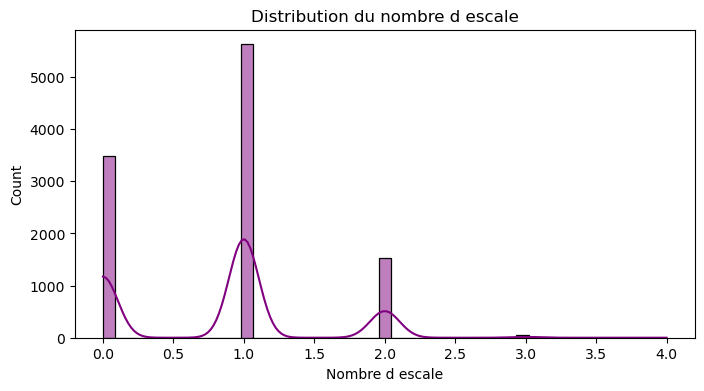

In [20]:
# Histogramme
plt.figure(figsize=(8, 4))
sns.histplot(data["Total_Stops"], kde=True, color="purple")
plt.title("Distribution du nombre d escale")
plt.xlabel("Nombre d escale")
plt.show()

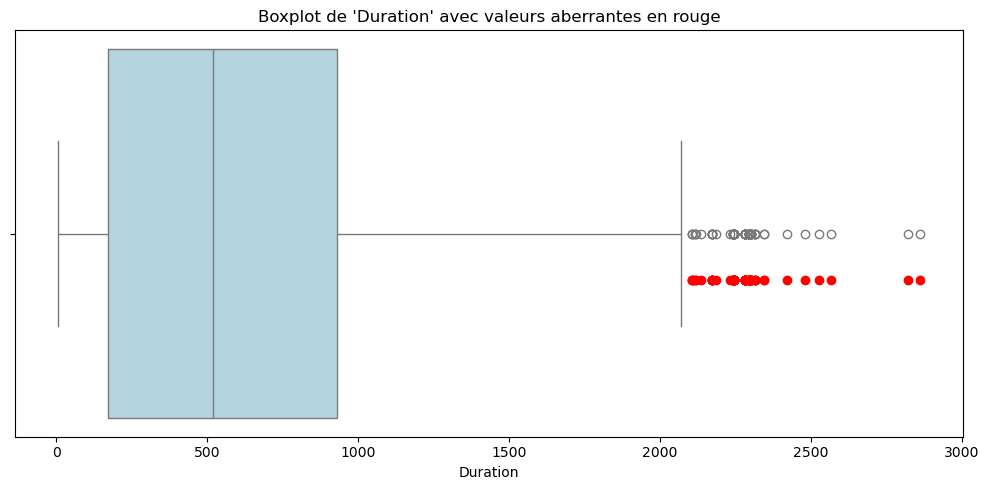

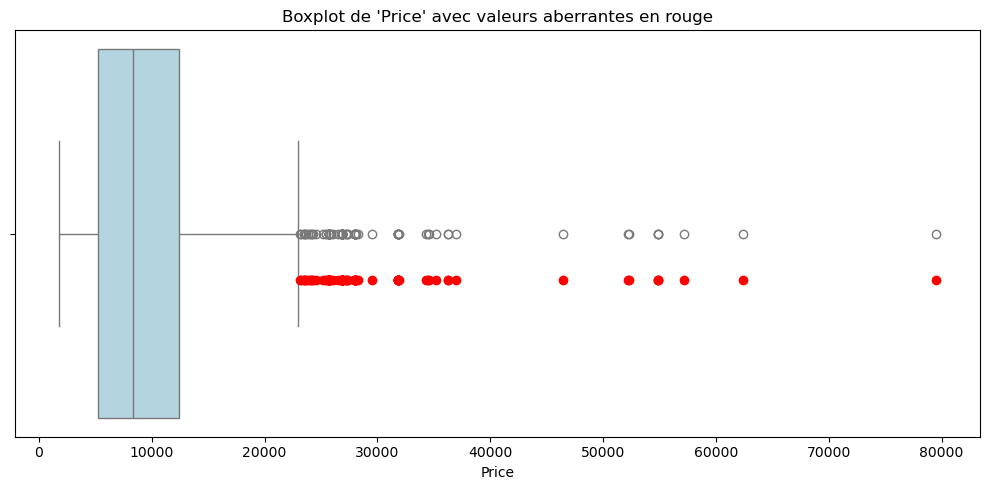

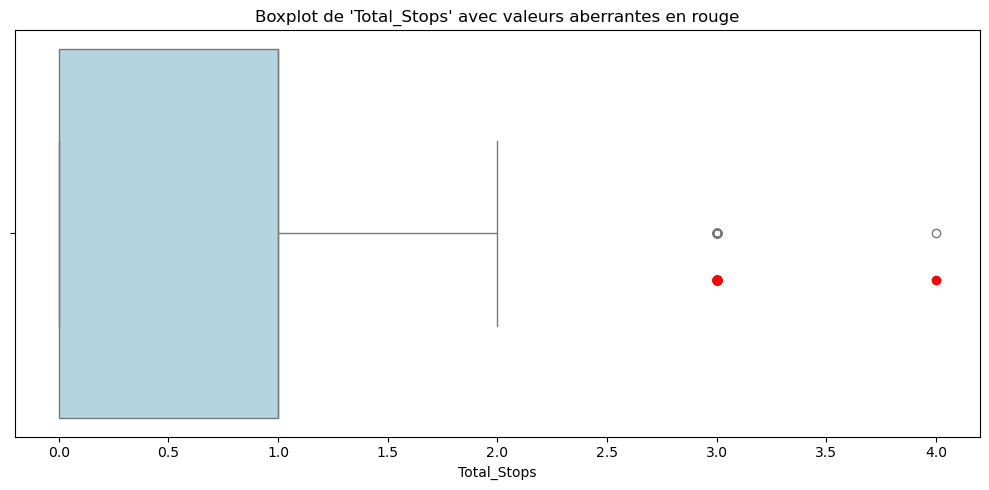

In [21]:
# Fonction pour détecter les outliers avec IQR
def get_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Liste des variables à analyser
columns = ["Duration", "Price", "Total_Stops"]

# Génération des boxplots
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=col, color="lightblue")

    # Récupération des outliers
    outliers = get_outliers_iqr(data[col])

    # Affichage des points rouges
    y_offset = 0.1
    for val in outliers:
        plt.plot(val, 0 + y_offset, 'ro')

    plt.title(f"Boxplot de '{col}' avec valeurs aberrantes en rouge")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [22]:
def replace_outliers_in_columns(df, columns, method="median"):
    df_cleaned = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        if method == "median":
            replacement_value = df[col].median()
        elif method == "mean":
            replacement_value = df[col].mean()

        if method in ["median", "mean"]:
            df_cleaned[col] = df[col].apply(
                lambda x: replacement_value if x < lower or x > upper else x
            )
        elif method == "bounds":
            df_cleaned[col] = df[col].apply(
                lambda x: lower if x < lower else upper if x > upper else x
            )
        else:
            raise ValueError("Méthode inconnue : utiliser 'mean', 'median' ou 'bounds'")
    
    return df_cleaned

In [23]:
data = replace_outliers_in_columns(data, ["Duration", "Price", "Total_Stops" ], method="bounds")

In [24]:
data.describe(include="number")

,Duration,Total_Stops,Price
count,10682.000000,10682.000000,10682.000000
mean,641.587718,0.821943,9022.042501
std,503.380704,0.668681,4260.560453
min,5.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,520.000000,1.000000,8372.000000
75%,930.000000,1.000000,12373.000000
max,2070.000000,2.500000,23017.000000


In [25]:
data.describe(include="O")

,Airline,Source,Destination,Route,Additional_Info
count,10682,10682,10682,10682,10682
unique,12,5,6,128,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info
freq,3849,4536,4536,2376,8344


In [26]:
data.describe(include="datetime")

,Date_of_Journey,Dep_Time,Arrival_Time
count,10682,10682,10682
mean,2019-05-04 19:56:32.398427392,2025-04-30 12:53:52.203707136,2025-05-03 11:51:43.828870912
min,2019-03-01 00:00:00,2025-04-30 00:20:00,2025-03-02 00:05:00
25%,2019-03-27 00:00:00,2025-04-30 08:00:00,2025-04-30 12:00:00
50%,2019-05-15 00:00:00,2025-04-30 11:50:00,2025-04-30 19:15:00
75%,2019-06-06 00:00:00,2025-04-30 18:05:00,2025-05-10 03:16:15
max,2019-06-27 00:00:00,2025-04-30 23:55:00,2025-06-29 04:25:00


#### Variable : Airline

In [27]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

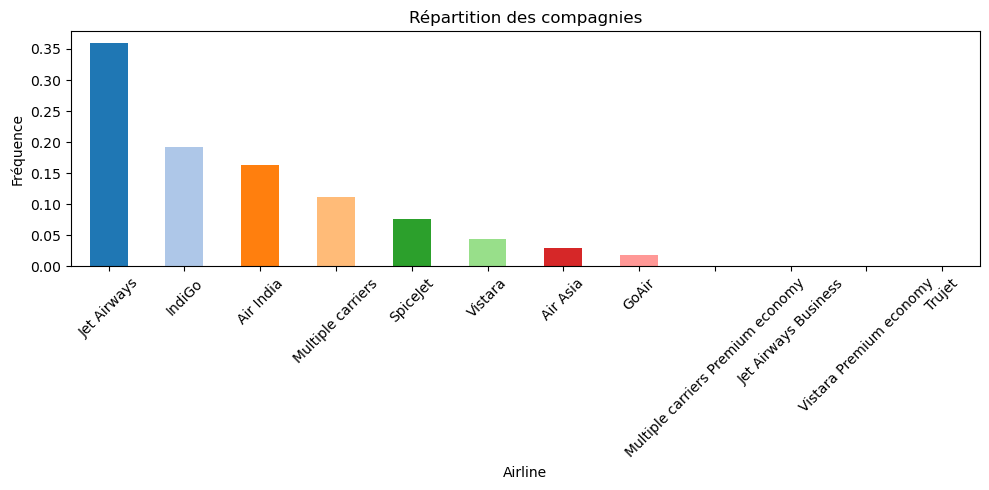

In [28]:
# Créer une palette de couleurs automatiquement (ex: tab20)
colors = plt.cm.tab20.colors  # Tu peux aussi essayer tab10, Set3, etc.

# Nombre de compagnies
n_airlines = data['Airline'].nunique()

# Affichage
plt.figure(figsize=(10, 5))
data['Airline'].value_counts(normalize=True).plot(
    kind='bar',
    color=colors[:n_airlines]  # utiliser autant de couleurs que d’Airlines
)

plt.title("Répartition des compagnies")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Variable : Destination

In [29]:
data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\1795414505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\1795414505.py:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(


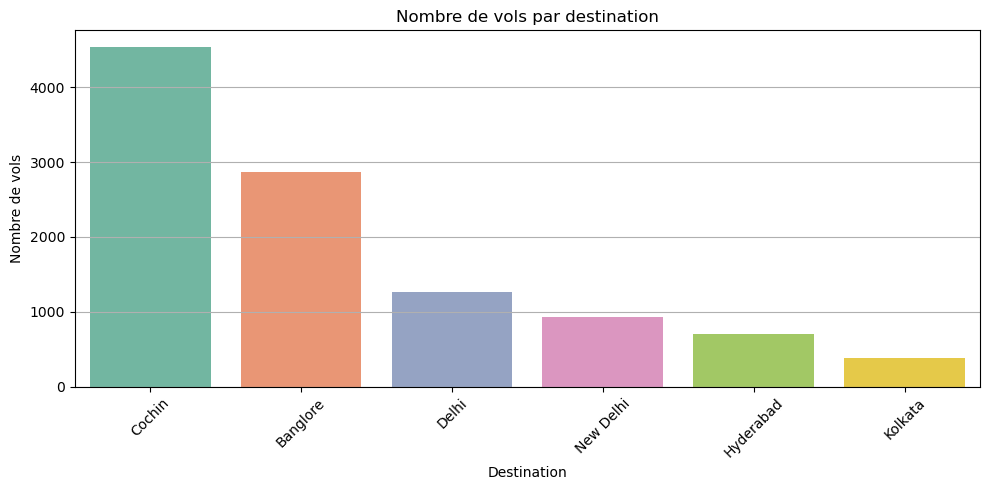

In [30]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data=data,
    x="Destination",
    order=data["Destination"].value_counts().index,
    palette=sns.color_palette("Set2")  # Palette avec plusieurs jolies couleurs
)

plt.title("Nombre de vols par destination")
plt.xlabel("Destination")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

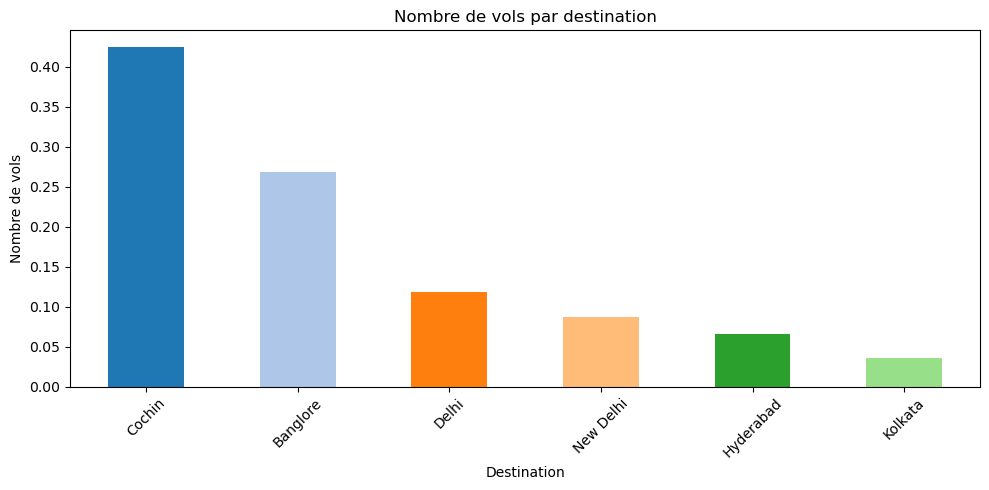

In [31]:
# Créer une palette de couleurs automatiquement (ex: tab20)
colors = plt.cm.tab20.colors  # Tu peux aussi essayer tab10, Set3, etc.

# Nombre de compagnies
n_airlines = data['Destination'].nunique()

# Affichage
plt.figure(figsize=(10, 5))
data['Destination'].value_counts(normalize=True).plot(
    kind='bar',
    color=colors[:n_airlines]  # utiliser autant de couleurs que d’Airlines
)

plt.title("Nombre de vols par destination")
plt.xlabel("Destination")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Variable : Total Stop

In [32]:
data["Total_Stops"].value_counts()

Total_Stops
1.0    5625
0.0    3491
2.0    1520
2.5      46
Name: count, dtype: int64

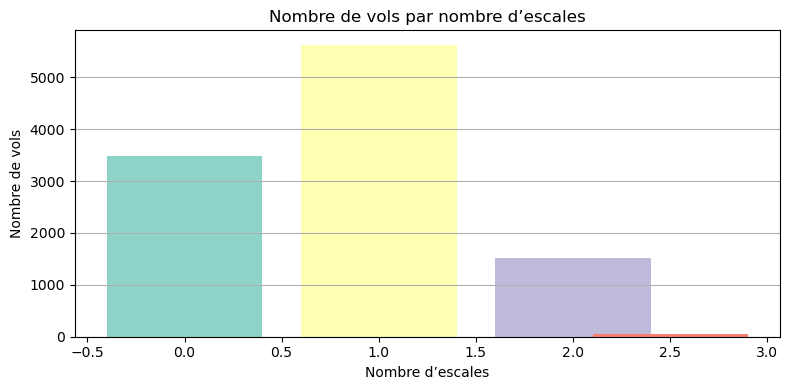

In [33]:
# Récupération et tri des données
unique_stops = data["Total_Stops"].value_counts().sort_index()

# Générer une palette (convertie en liste de strings ou tuples de couleurs)
from itertools import islice
colors = list(islice(plt.cm.Set3.colors, len(unique_stops)))  # extrait uniquement le nombre nécessaire

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(unique_stops.index, unique_stops.values, color=colors)

plt.title("Nombre de vols par nombre d’escales")
plt.xlabel("Nombre d’escales")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Variable : Additional Info

In [34]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

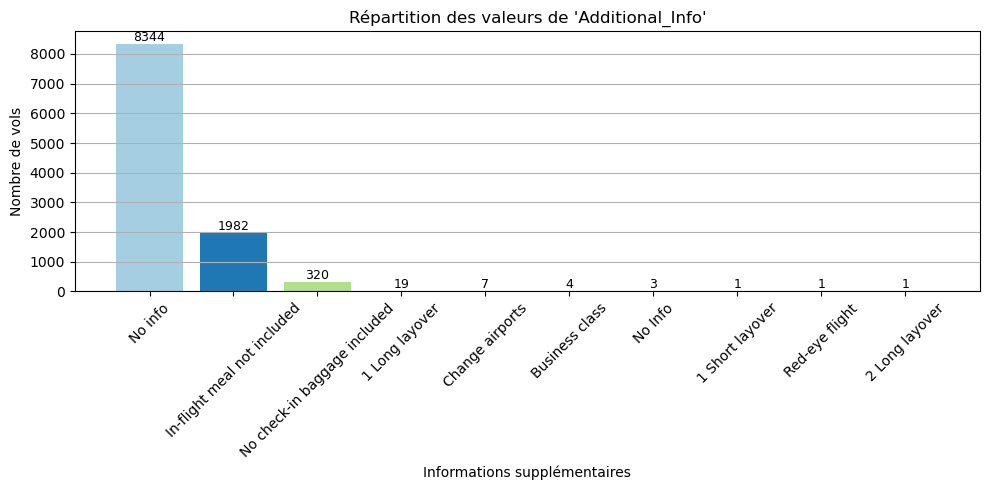

In [38]:
# Comptage des catégories
info_counts = data["Additional_Info"].value_counts()

# Palette dynamique
colors = sns.color_palette("Paired", len(info_counts))

# Affichage
plt.figure(figsize=(10, 5))
bars = plt.bar(info_counts.index, info_counts.values, color=colors)

plt.title("Répartition des valeurs de 'Additional_Info'")
plt.ylabel("Nombre de vols")
plt.xlabel("Informations supplémentaires")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


#### Variable : heure de départ

In [39]:
# Extraction de l’heure
data["dep_hour"] = data["Dep_Time"].dt.hour

# Catégorisation
def part_of_day(hour):
    if 4 <= hour < 12:
        return "matin"
    elif 12 <= hour < 16:
        return "après-midi"
    elif 16 <= hour < 20:
        return "soir"
    else:
        return "nuit"

data["part_of_day"] = data["dep_hour"].apply(part_of_day)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\2778041749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


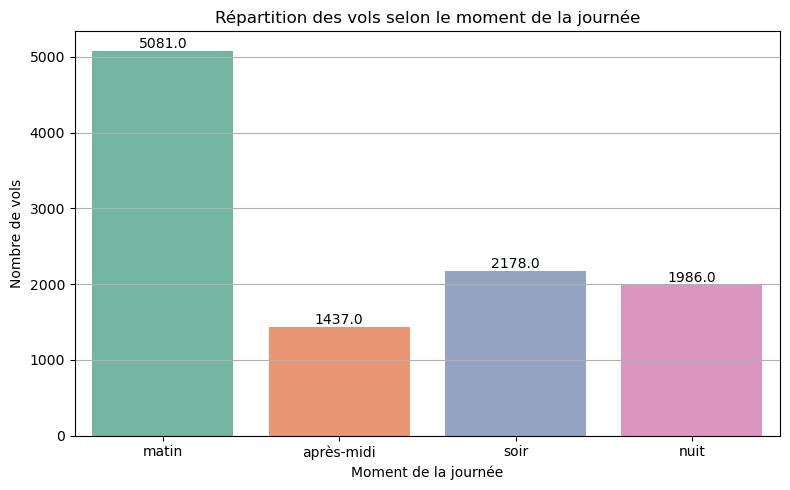

In [40]:
# Visualisation avec annotations
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x="part_of_day",
    data=data,
    order=["matin", "après-midi", "soir", "nuit"],
    palette="Set2"
)

plt.title("Répartition des vols selon le moment de la journée")
plt.xlabel("Moment de la journée")
plt.ylabel("Nombre de vols")
plt.grid(axis="y")

# Ajouter les labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Variable : Date of journey

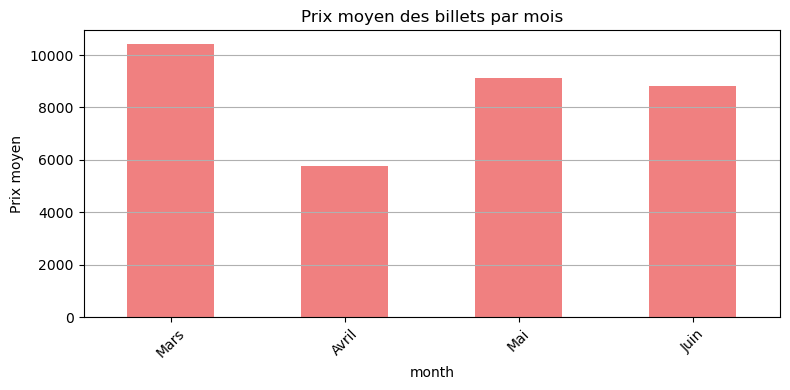

In [41]:
# Assurer la conversion en datetime (si ce n'est pas déjà fait)
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], dayfirst=True, errors='coerce')

# Extraire le mois
data["month"] = data["Date_of_Journey"].dt.month

# Calcul du prix moyen par mois
monthly_price = data.groupby("month")["Price"].mean().sort_index()

# Dictionnaire pour convertir numéro → nom du mois
mois_noms = {
    3: "Mars", 4: "Avril", 5: "Mai", 6: "Juin", 7: "Juillet", 8: "Août",
    9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Décembre", 1: "Janvier", 2: "Février"
}

# Appliquer les noms de mois comme labels
mois_labels = [mois_noms[m] for m in monthly_price.index]

# Tracé
plt.figure(figsize=(8, 4))
monthly_price.plot(kind="bar", color="lightcoral")
plt.title("Prix moyen des billets par mois")
plt.ylabel("Prix moyen")
plt.xticks(ticks=range(len(mois_labels)), labels=mois_labels, rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

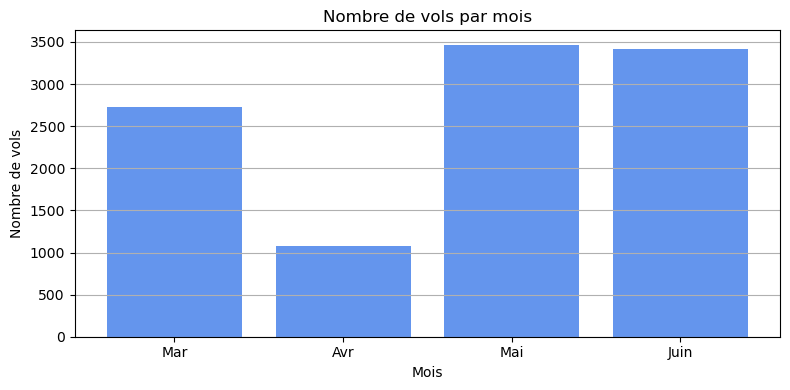

In [42]:
# Assurer que la date est en datetime
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], dayfirst=True, errors='coerce')
data["month"] = data["Date_of_Journey"].dt.month

# Comptage des vols par mois, trié
monthly_counts = data["month"].value_counts().sort_index()

# Mapping des noms de mois
mois_labels = {
    1: "Jan", 2: "Fév", 3: "Mar", 4: "Avr",
    5: "Mai", 6: "Juin", 7: "Juil", 8: "Août",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Déc"
}
labels = [mois_labels[m] for m in monthly_counts.index]

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color="cornflowerblue")
plt.title("Nombre de vols par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de vols")
plt.xticks(ticks=monthly_counts.index, labels=labels)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### BIVARIÉE & MULTIVARIÉE

#### Corrélations entre variables numériques

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\1717059901.py:13: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


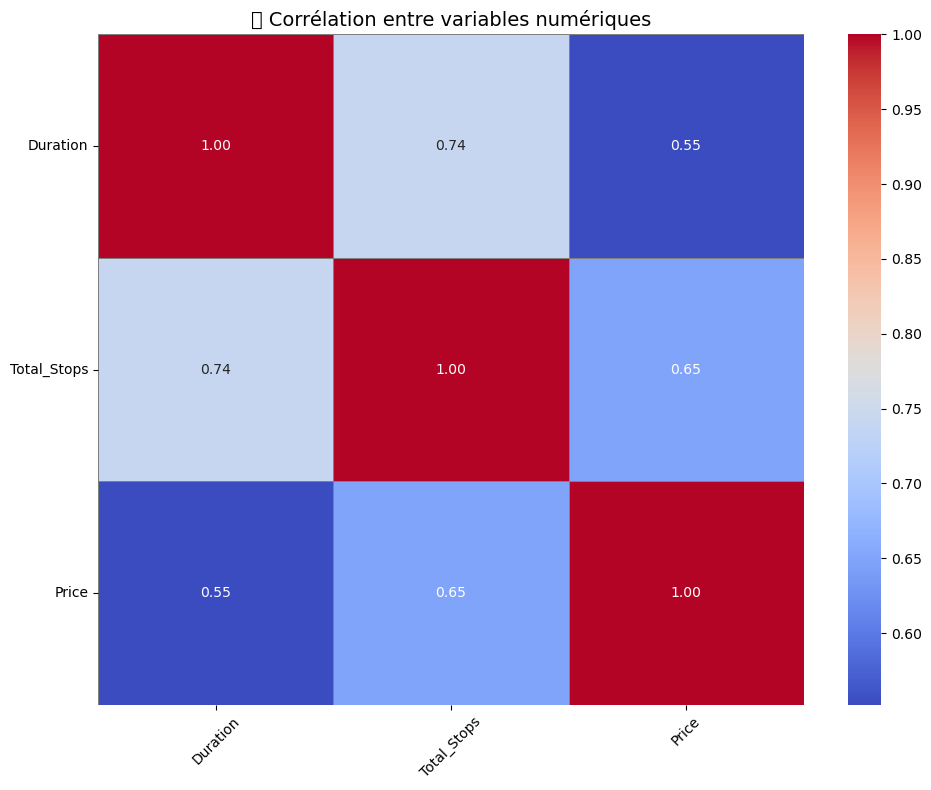

In [43]:
# Sélection des colonnes numériques
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Calcul de la matrice de corrélation
corr_matrix = data[numeric_cols].corr()

# Affichage du heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("📌 Corrélation entre variables numériques", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test de normalité

In [44]:
from scipy.stats import shapiro,spearmanr
from scipy import stats
for col  in numeric_cols:
    stat, p = shapiro(data[col])
    print(f"{col}: {col} - p-value normalité: {p:.4f}")


Duration: Duration - p-value normalité: 0.0000
Total_Stops: Total_Stops - p-value normalité: 0.0000
Price: Price - p-value normalité: 0.0000


C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Test de corrélation (spearman)

In [45]:
def compute_significant_spearman_correlations(df, alpha=0.05):
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    results = []

    for i, col1 in enumerate(numeric_cols):
        for col2 in numeric_cols[i+1:]:
            corr, p = spearmanr(df[col1], df[col2])
            if p < alpha:
                results.append({
                    "Variable 1": col1,
                    "Variable 2": col2,
                    "Corrélation": round(corr, 2),
                    "p-value": round(p, 4)
                })

    return pd.DataFrame(results).sort_values(by="Corrélation", key=abs, ascending=False)

# Exemple d'utilisation
significant_spearman_corrs = compute_significant_spearman_correlations(data)
display(significant_spearman_corrs)

,Variable 1,Variable 2,Corrélation,p-value
0,Duration,Total_Stops,0.82,0.0
2,Total_Stops,Price,0.72,0.0
1,Duration,Price,0.69,0.0


In [ ]:
#from scipy.stats import pearsonr
#import pandas as pd

#def compute_significant_correlations(df, alpha=0.05):
 #   numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
  #  results = []

   # for i, col1 in enumerate(numeric_cols):
    #    for col2 in numeric_cols[i+1:]:
     #       corr, p = pearsonr(df[col1], df[col2])
      #      if p < alpha:
       #         results.append({
        #            "Variable 1": col1,
         #           "Variable 2": col2,
          #          "Corrélation": round(corr, 2),
           #         "p-value": round(p, 4)
            #    })

    #return pd.DataFrame(results).sort_values(by="Corrélation", key=abs, ascending=False)

# Exemple d'utilisation
#significant_corrs = compute_significant_correlations(data)
#display(significant_corrs)

#### Boxplot du prix selon le nombre de scale

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\1428463133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Total_Stops", y="Price", data=data, palette="Set2")
C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


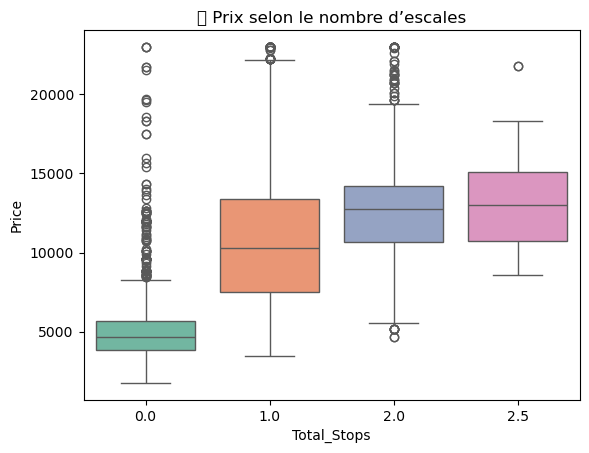

In [46]:
sns.boxplot(x="Total_Stops", y="Price", data=data, palette="Set2")
plt.title("🛑 Prix selon le nombre d’escales")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\1932965956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="escale", y="Price", data=data, palette="Set2")
C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


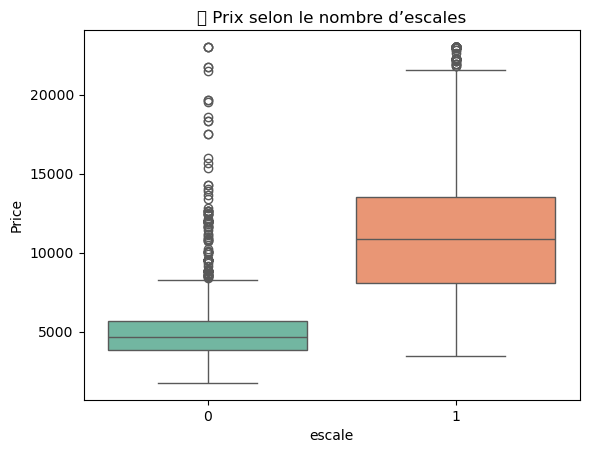

In [47]:
# Création d'une variable binaire : 0 = sans escale, 1 = avec escale
data['escale'] = data['Total_Stops'].apply(lambda x: 0 if x == 0 else 1)
prix_sans_escale = data[data['escale'] == 0]['Price']
prix_avec_escale = data[data['escale'] == 1]['Price']
sns.boxplot(x="escale", y="Price", data=data, palette="Set2")
plt.title("🛑 Prix selon le nombre d’escales")
plt.show()

#### Test de student

In [48]:
t_stat, p_value = stats.ttest_ind(prix_sans_escale, prix_avec_escale, equal_var=False)
print(f"T-statistique = {t_stat:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Le prix diffère significativement selon la présence d'escale.")
else:
    print("Aucune différence significative du prix selon la présence d'escale.")


T-statistique = -107.617, p-value = 0.0000
Le prix diffère significativement selon la présence d'escale.


#### Barplot du prix moyen par compagnie (Airline)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\216354843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Airline", y="Price", data=data, palette="Set2")
C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\216354843.py:6: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


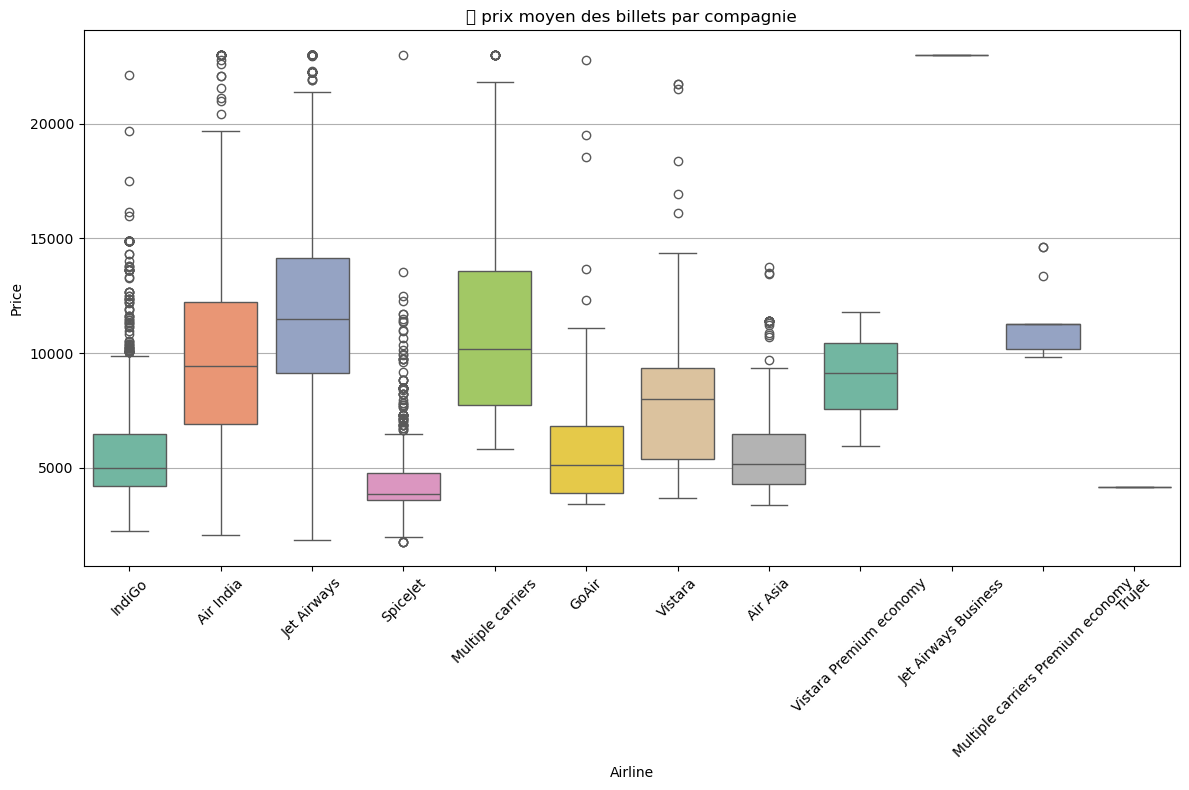

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Airline", y="Price", data=data, palette="Set2")
plt.title("🛑 prix moyen des billets par compagnie")
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

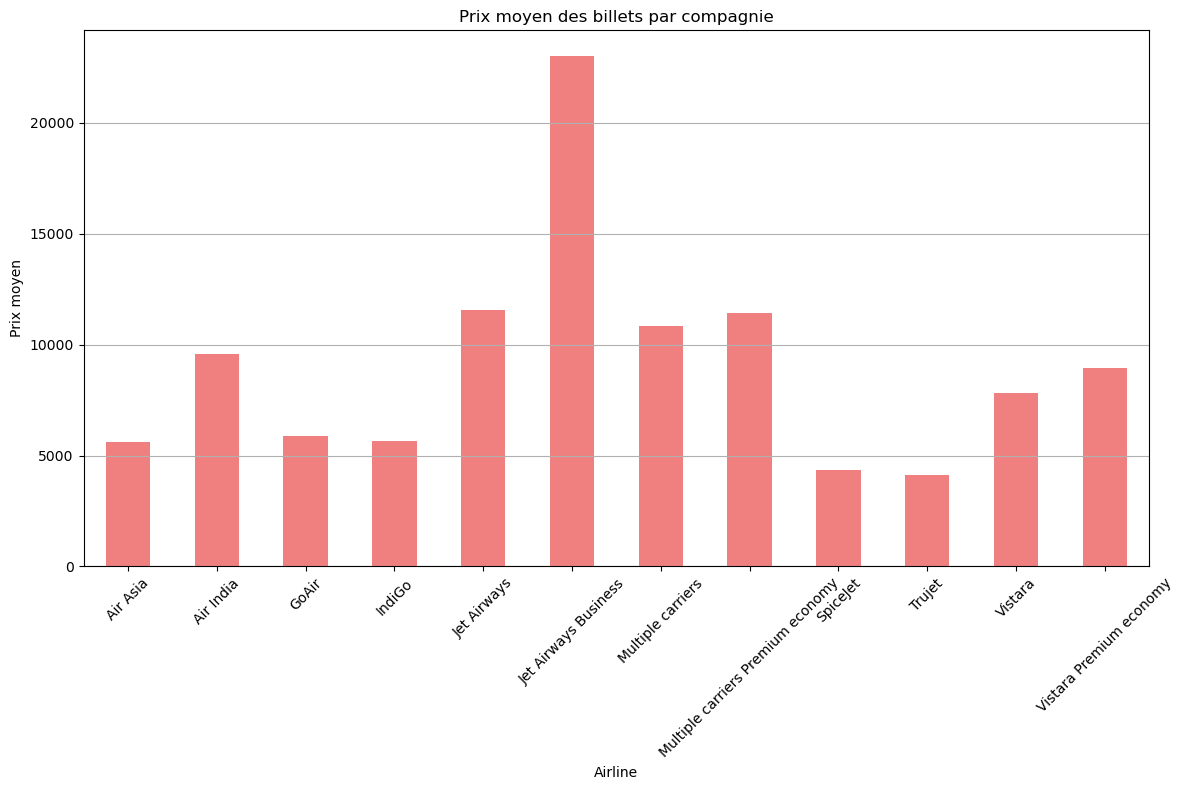

In [50]:
airline_price = data.groupby("Airline")["Price"].mean().sort_index()
# Tracé
plt.figure(figsize=(12, 8))
airline_price.plot(kind="bar", color="lightcoral")
plt.title("Prix moyen des billets par compagnie")
plt.ylabel("Prix moyen")
plt.xticks( rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### Tester si le prix moyen diffère significativement selon la compagnie

In [52]:
#from scipy.stats import shapiro,kruskal

#for name, group in data.groupby('Airline'):
 #   stat, p = shapiro(group['Price'])
  #  print(f"Airline: {name} - p-value normalité: {p:.4f}")

from scipy.stats import shapiro

for name, group in data.groupby('Airline'):
    if len(group['Price']) >= 3:
        stat, p = shapiro(group['Price'])
        print(f"Airline: {name} - p-value normalité: {p:.4f}")
    else:
        print(f"Airline: {name} - pas assez de données ({len(group['Price'])} observations) pour le test de Shapiro")



Airline: Air Asia - p-value normalité: 0.0000
Airline: Air India - p-value normalité: 0.0000
Airline: GoAir - p-value normalité: 0.0000
Airline: IndiGo - p-value normalité: 0.0000
Airline: Jet Airways - p-value normalité: 0.0000
Airline: Jet Airways Business - p-value normalité: 1.0000
Airline: Multiple carriers - p-value normalité: 0.0000
Airline: Multiple carriers Premium economy - p-value normalité: 0.0077
Airline: SpiceJet - p-value normalité: 0.0000
Airline: Trujet - pas assez de données (1 observations) pour le test de Shapiro
Airline: Vistara - p-value normalité: 0.0000
Airline: Vistara Premium economy - p-value normalité: 0.9077


C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


##### Comme la normalité n’est pas respectée dans la plupart des groupes, utilisons un test non paramétrique(Kruskal-Wallis) pour comparer les prix moyens entre compagnies

#### Test de kruskal Wallis 

In [53]:
# Création de la liste des groupes de prix par compagnie
grouped_prices = [group["Price"].values for name, group in data.groupby("Airline")]

# Test de Kruskal-Wallis
h_stat, p_value = kruskal(*grouped_prices)

print(f"H-statistique = {h_stat:.3f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une différence significative des prix moyens selon la compagnie.")
else:
    print("Aucune différence significative des prix moyens selon la compagnie.")


H-statistique = 4869.840
p-value = 0.0000
Il existe une différence significative des prix moyens selon la compagnie.


#### Prix en fonction de la durée (Duration) code python

C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

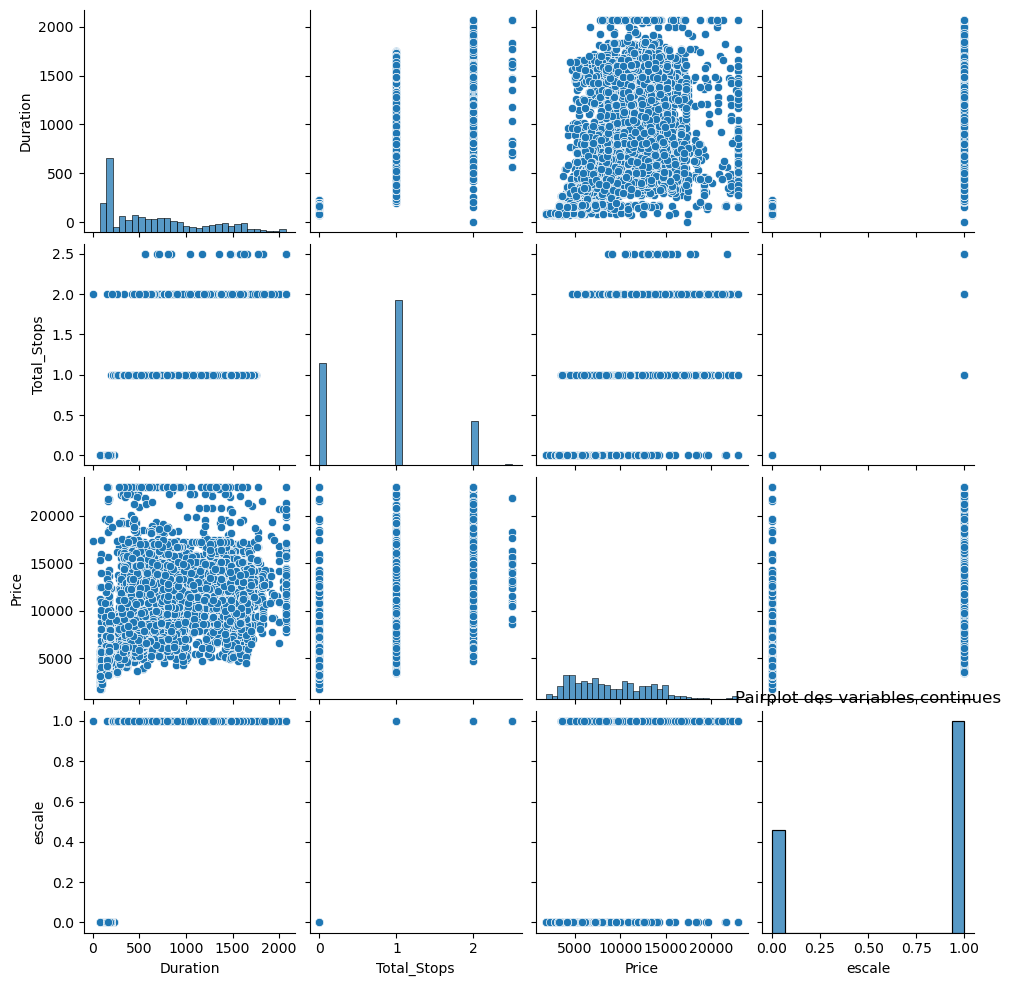

In [54]:
# pair plot des variables continues
plt.figure(figsize = (10,8))
sns.pairplot(data = data.select_dtypes(include=["int64", "float64"]),diag_kind = 'hist')
plt.title('Pairplot des variables continues')
plt.show( )

C:\Users\Hp\AppData\Local\Temp\ipykernel_13424\2998859190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="info_vol", y="Price", data=data, palette="Set2")
C:\Users\Hp\anaconda3\anaconda\envs\PHYTON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


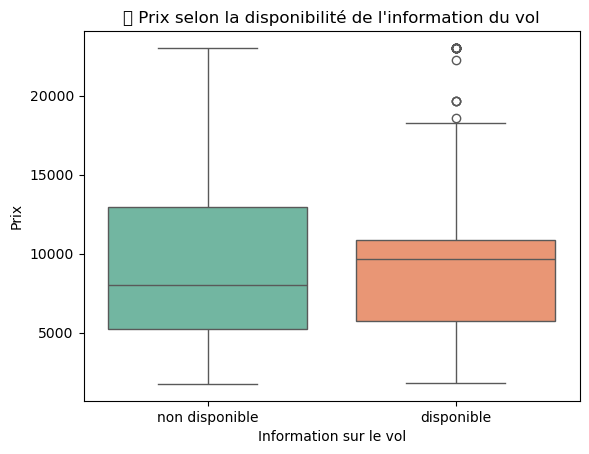

In [55]:
# Création d'une variable binaire : 0 = sans escale, 1 = avec escale
data['info_vol'] = data['Additional_Info'].apply(lambda x: 'non disponible' if x == 'No info' else 'disponible')
prix_vol_info = data[data['info_vol'] == 'disponible']['Price']
prix_vol_non_info = data[data['info_vol'] == 'non disponible']['Price']
sns.boxplot(x="info_vol", y="Price", data=data, palette="Set2")
plt.title("🛑 Prix selon la disponibilité de l'information du vol")
plt.xlabel("Information sur le vol")
plt.ylabel("Prix")
plt.show()


#### Test de manwhitneyu

In [56]:
from scipy.stats import mannwhitneyu

prix_vol_info = data[data['info_vol'] == 'disponible']['Price']
prix_vol_non_info = data[data['info_vol'] == 'non disponible']['Price']

stat, p = mannwhitneyu(prix_vol_info, prix_vol_non_info)
print(f"U-statistique = {stat:.3f}, p-value = {p:.4f}")

if p < 0.05:
    print("Différence significative de prix selon l'information du vol.")
else:
    print("Pas de différence significative de prix selon l'information du vol.")


U-statistique = 9621542.000, p-value = 0.3143
Pas de différence significative de prix selon l'information du vol.
